<a href="https://colab.research.google.com/github/Sanskruti-Shimple/Temperature-Sensor-Failure-Detection-and-Diagnosis-Based-on-the-ARIMA-Model/blob/main/RTD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def parser(x):
    return datetime.strptime(x,'%H:%M:%S')

sales = pd.read_csv('/content/time-healthy.csv',index_col=0, parse_dates=[0] ,date_parser=parser)

In [ ]:
sales.head()

,healthy
time,
1900-01-01 07:52:50,21.03
1900-01-01 07:52:51,21.20
1900-01-01 07:52:53,21.34
1900-01-01 07:52:54,21.54
1900-01-01 07:52:56,21.71


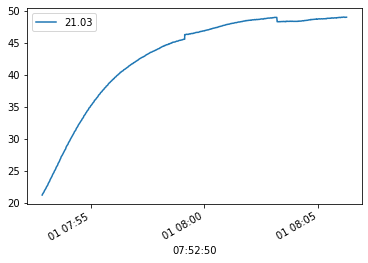

In [ ]:
sales.plot()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


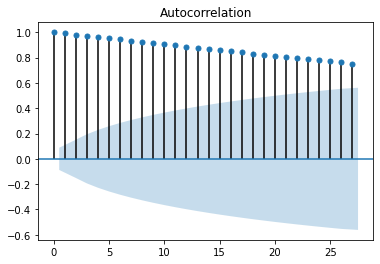

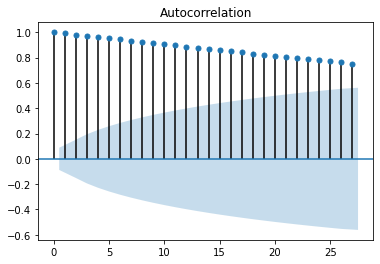

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales)

In [ ]:
#Converting series to stationary
sales.head()

,21.03
07:52:50,
1900-01-01 07:52:52,21.20
1900-01-01 07:52:53,21.34
1900-01-01 07:52:55,21.54
1900-01-01 07:52:57,21.71
1900-01-01 07:52:58,21.88


In [ ]:
sales.shift(1)

,21.03
07:52:50,
1900-01-01 07:52:52,NaN
1900-01-01 07:52:53,21.20
1900-01-01 07:52:55,21.34
1900-01-01 07:52:57,21.54
1900-01-01 07:52:58,21.71
...,...
1900-01-01 08:06:08,48.99
1900-01-01 08:06:10,49.02
1900-01-01 08:06:11,48.99


In [ ]:
sales_diff = sales.diff(periods=1)

In [ ]:
sales_diff = sales_diff[1:]
sales_diff.head()

,21.03
07:52:50,
1900-01-01 07:52:53,0.14
1900-01-01 07:52:55,0.20
1900-01-01 07:52:57,0.17
1900-01-01 07:52:58,0.17
1900-01-01 07:53:00,0.20


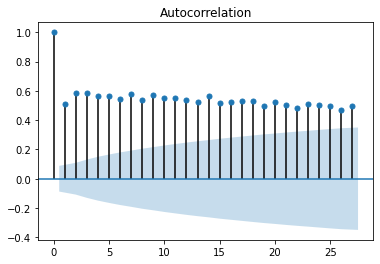

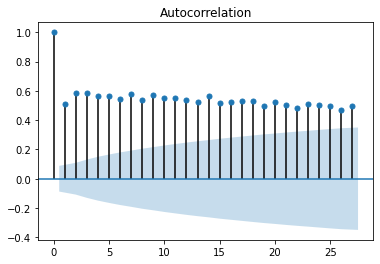

In [ ]:
plot_acf(sales_diff)

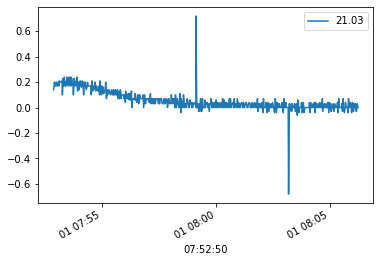

In [ ]:
sales_diff.plot()

In [ ]:
X = sales.values
train = X[:400] # 27 data as train data
test = X[400:]  # 9 data as test data
predictions = []

In [ ]:
train.size

400

In [ ]:
##Autoreggresive AR Model

In [ ]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [ ]:
predictions = model_ar_fit.predict(start=400,end=500)

In [ ]:
test

array([[48.34],
       [48.34],
       [48.34],
       [48.34],
       [48.34],
       [48.38],
       [48.34],
       [48.34],
       [48.38],
       [48.34],
       [48.34],
       [48.34],
       [48.34],
       [48.34],
       [48.34],
       [48.34],
       [48.34],
       [48.34],
       [48.38],
       [48.34],
       [48.38],
       [48.38],
       [48.38],
       [48.38],
       [48.41],
       [48.41],
       [48.45],
       [48.41],
       [48.45],
       [48.48],
       [48.48],
       [48.48],
       [48.51],
       [48.51],
       [48.51],
       [48.55],
       [48.58],
       [48.58],
       [48.58],
       [48.58],
       [48.65],
       [48.62],
       [48.62],
       [48.65],
       [48.65],
       [48.65],
       [48.68],
       [48.68],
       [48.68],
       [48.68],
       [48.72],
       [48.68],
       [48.72],
       [48.72],
       [48.75],
       [48.72],
       [48.72],
       [48.72],
       [48.75],
       [48.72],
       [48.72],
       [48.75],
       [

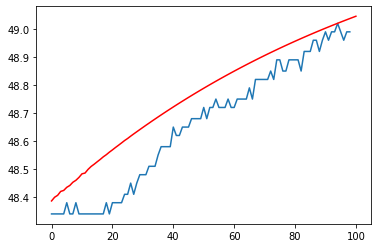

In [ ]:
plt.plot(test)
plt.plot(predictions,color='red')

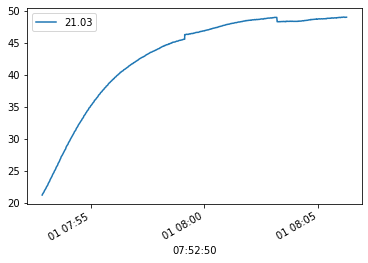

In [ ]:
sales.plot()

In [ ]:
#ARIMA model

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
#p,d,q  p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model
model_arima = ARIMA(train,order=(1, 1, 1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)


-1123.2915681262218


In [ ]:
predictions= model_arima_fit.forecast(steps=100)[0]
predictions

array([48.37492666, 48.3699542 , 48.36508251, 48.36031147, 48.35564097,
       48.35107091, 48.34660116, 48.34223162, 48.33796217, 48.3337927 ,
       48.3297231 , 48.32575326, 48.32188306, 48.31811239, 48.31444115,
       48.31086922, 48.30739649, 48.30402284, 48.30074818, 48.29757238,
       48.29449533, 48.29151693, 48.28863707, 48.28585563, 48.28317251,
       48.28058759, 48.27810076, 48.27571192, 48.27342096, 48.27122776,
       48.26913221, 48.26713421, 48.26523365, 48.26343042, 48.2617244 ,
       48.2601155 , 48.25860359, 48.25718858, 48.25587036, 48.25464881,
       48.25352382, 48.2524953 , 48.25156313, 48.2507272 , 48.24998741,
       48.24934364, 48.2487958 , 48.24834377, 48.24798745, 48.24772672,
       48.24756149, 48.24749164, 48.24751707, 48.24763767, 48.24785333,
       48.24816395, 48.24856943, 48.24906965, 48.24966451, 48.2503539 ,
       48.25113772, 48.25201587, 48.25298823, 48.2540547 , 48.25521517,
       48.25646955, 48.25781772, 48.25925958, 48.26079503, 48.26

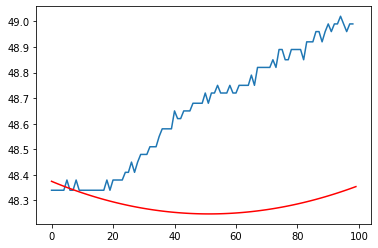

In [ ]:
plt.plot(test)
plt.plot(predictions,color='red')

In [ ]:
mean_squared_error(test,predictions)

ValueError: ignored

In [ ]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [ ]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 2761.950028163194
(0, 0, 1) 2220.221985542591
(0, 0, 3) 1283.7106526206428
(0, 1, 0) -837.8331347708795
(0, 1, 1) -894.3828011911667
(0, 1, 2) -941.2281676821115
(0, 1, 3) -972.9571294001992
(0, 1, 4) -990.6695429787526
(0, 2, 0) -825.0795814593166
(0, 2, 1) -1132.3799264910015
(1, 0, 0) -627.1013699317682
(1, 0, 1) -749.4792160197708
(1, 0, 2) -824.9780636479102
(1, 0, 3) -876.0283083498146
(1, 0, 4) -905.5883556366452
(1, 1, 0) -943.6770415916706
(1, 1, 1) -1123.2915681262218
(1, 1, 2) -1130.5051846420972
(1, 1, 3) -1128.637398307206
(1, 2, 0) -982.8503665984724
(1, 2, 1) -1139.0107683987883
(1, 2, 2) -1137.0110020023606
(1, 2, 3) -1135.1121350434257
(1, 2, 4) -1133.9078147844496
(2, 0, 0) -819.5016982676555
(2, 0, 1) -1109.2355225165416
(2, 0, 2) -1107.0388851807702
(2, 0, 3) -1111.637725359456
(2, 1, 0) -1022.1688922016122
(2, 1, 1) -1130.600216522295
(2, 1, 2) -1106.9206904754626
(2, 1, 3) -1126.859896557564
(2, 1, 4) -1125.4182275824953
(2, 2, 0) -1040.9727416777703
(2,